In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten

2.9.1


In [2]:
#(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

In [3]:
#trainX.shape

In [4]:
#trainY.shape

In [5]:
#trainY = to_categorical(trainY)
#testY = to_categorical(testY)

In [6]:
#trainY.shape

In [7]:
#testY.shape

In [8]:
from tokenize import Number
import numpy as np
#np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

import time
from datetime import datetime
from datetime import timedelta
import math

In [9]:
inicio = time.time()

In [10]:
#datos para la conexion a la base de datos
hostname = '82.180.175.58'
username = 'u813407238_lora'
password = 'Seguimiento_lora_123'
database = 'u813407238_seguimiento'

In [11]:
import MySQLdb
# inicialmente hace la conexion con la base de datos
myConnection = MySQLdb.connect( host=hostname, user=username, passwd=password, db=database )
import pandas as pd
# genera la lectura de la base de datos
dataset= pd.read_sql("SELECT * FROM LoRaWAN_messages_calle_5 order by id",myConnection)
print("Va a imprimir el dataset leido de la BD...")
#print(dataset)
#dataset[['COL 3','COL 4']].dtypes
#dataset = pd.DataFrame()
#dataset['T'] = dataset['date'] +' '+ dataset['time']
#dataset['date hour'] = dataset['date'] +' '+ dataset['hour']
#dataset = pd.to_datetime(dataset['date'] + dataset['time'])
print("Va a imprimir date y time...")

C:\Users\ander\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Va a imprimir el dataset leido de la BD...
Va a imprimir date y time...


In [12]:
#pip install mysqlclient

In [13]:
#dataset.head

In [14]:
dataset.drop(index=dataset[dataset['latitude']=='0'].index, inplace=True)

In [15]:
#dataset.info()

In [16]:
time = dataset['hour']

In [17]:
dataset

,id,dev_id,date,hour,latitude,longitude,speed,accx,accy,accz,gyrox,gyroy,gyroz,SF,BW,CR
17,18,tarjeta2-cubecell,2022-08-31,0 days 13:47:22,2.4494545,-76.6269796,0.62968,-0.1043366,-0.7579422,9.8896343,0.2024117,-0.2121214,0.0974049,7,125000,4/5
18,19,tarjeta2-cubecell,2022-08-31,0 days 13:47:33,2.4494231,-76.6269756,0,-0.1043366,-0.8920633,9.8225738,-0.041863,0.0474205,0.2042751,7,125000,4/5
19,20,tarjeta2-cubecell,2022-08-31,0 days 13:47:43,2.4493666,-76.6269073,0,-0.1211018,-0.7986575,9.7770684,0.2482132,-0.349526,0.0821378,7,125000,4/5
20,21,tarjeta2-cubecell,2022-08-31,0 days 13:47:54,2.4493663,-76.6268878,0,-0.1546321,-0.8369779,9.7722784,0.2482132,0.077955,0.1279393,7,125000,4/5
21,22,tarjeta2-cubecell,2022-08-31,0 days 13:48:06,2.4493705,-76.6268905,0,-0.1234968,-0.856138,9.8537091,0.324549,0.1084892,0.1890079,7,125000,4/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,275,tarjeta2-cubecell,2022-08-31,0 days 14:36:37,2.4503646,-76.6269323,24.13156,1.2033439,-2.9853105,7.638316,-0.4846112,-2.5938007,-2.5896177,7,125000,4/5
275,276,tarjeta2-cubecell,2022-08-31,0 days 14:36:48,2.4502795,-76.6266823,14.00112,-0.1091267,-6.2257719,11.5829132,-0.3930082,-8.9449462,13.8378629,7,125000,4/5
276,277,tarjeta2-cubecell,2022-08-31,0 days 14:37:26,2.4495106,-76.6269685,1.0186,-0.3198884,-3.7301616,10.454859,-0.0876646,-8.9449462,6.4027485,7,125000,4/5
277,278,tarjeta2-cubecell,2022-08-31,0 days 14:37:38,2.4494831,-76.6269721,0,2.4224089,-1.6872098,9.0681427,1.1642438,4.0321536,-1.6735874,7,125000,4/5


In [18]:
dataset['latitude']=dataset['latitude'].astype('float64')
dataset['longitude']=dataset['longitude'].astype('float64')

In [19]:
#dataset.info()

In [20]:
d = pd.DataFrame()
d['latitud']=dataset['latitude']
d['longitude']=dataset['longitude']
d.to_csv('calle_5_original.csv')

In [21]:
def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia

In [22]:
time_step = 30

In [23]:
last = int(len(dataset)/5.0)

In [24]:
set_entrenamiento = dataset[:-last]
set_validacion = dataset[-last-time_step:]

In [25]:
#set_entrenamiento.info()

In [26]:
#set_validacion.info()

In [27]:
set_entrenamiento.reset_index(inplace=True, drop=True)
#set_entrenamiento

In [28]:
set_validacion.reset_index(inplace=True, drop=True)
#set_validacion

In [29]:
#set_validacion.info()

In [30]:
#set_entrenamiento.info()

In [31]:
x= np.column_stack((set_entrenamiento.iloc[:,[4]],set_entrenamiento.iloc[:,[5]],set_entrenamiento.iloc[:,[8]],set_entrenamiento.iloc[:,[12]]))

In [32]:
#x[0:1,:]

In [33]:
#x[0]

In [34]:
# Normalización del set de entrenamiento
sc1 = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc1.fit_transform(x)

In [35]:
#set_entrenamiento_latitud_escalado=x

In [36]:
#set_entrenamiento_latitud_escalado = np.array(set_entrenamiento_latitud_escalado).reshape(set_entrenamiento_latitud_escalado, ((set_entrenamiento_latitud_escalado.shape[0])/4), set_entrenamiento_latitud_escalado.shape[1], 4)

In [37]:
# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

In [38]:
for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0:5])
    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0:5])

In [39]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [40]:
Y_train.shape

(180, 4)

In [41]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))

In [42]:
X_train.shape

(180, 30, 4)

In [43]:
# Red LSTM
#Para crear la red debemos primero definir el tamaño de los datos de entrada y del dato de salida,
#así como el número total de neuronas (100):
dim_in = (X_train.shape[1],4)
dim_out = 4
neurons = 100

In [44]:
from keras.layers import Bidirectional
from tensorflow.keras.optimizers import SGD, Adam

In [45]:
def build_model(hp):
    #definicion de hiperparámetros a evaluar
    hp_batch_size = hp.Int('batch_size', min_value = 8, max_value = 128, step = 8)
    hp_seed = hp.Int('seed', min_value =0, max_value = 100, step = 1)
    hp_activation = hp.Choice('activation',['relu','tanh','linear','selu','elu','softmax'])
    recurrent_dropout = hp.Float('recurrent_dropout',min_value=0.0,max_value=0.99,default=0.2)
    hp_neurons = hp.Int('neurons1', min_value = 10, max_value = 200, step = 10)
    hp_neurons2 = hp.Int('neurons2', min_value = 10, max_value = 200, step = 10)
    hp_neurons3 = hp.Int('neurons3', min_value = 10, max_value = 200, step = 10)
    tf.random.set_seed(hp_seed)
    #definición del modelo de red neuronal
    modelo = Sequential()
    modelo.add(Bidirectional(LSTM(units=hp_neurons, activation=hp_activation, return_sequences=True, input_shape=dim_in)))
    modelo.add(Bidirectional(LSTM(hp_neurons2, activation=hp_activation, return_sequences=True)))
    modelo.add(Bidirectional(LSTM(hp_neurons3, activation=hp_activation, return_sequences=True)))
    #modelo.add(LSTM(200, activation=hp_activation,  return_sequences=True))
    modelo.add(Flatten())
    modelo.add(Dropout(recurrent_dropout))
    modelo.add(Dense(units=dim_out,activation=hp_activation))
    
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3])
    opt = Adam(learning_rate=hp_learning_rate)#, momentum=0.9)
    modelo.compile(optimizer=opt, loss='mse', metrics=['mse'])
    #modelo.compile(optimizer='Adam', loss='mse')
    #modelo.fit(X_train,Y_train,epochs=10,batch_size=32)
    #print(modelo.summary())
    return modelo

In [46]:
#pip install keras-tuner --upgrade

In [47]:
import keras_tuner

In [48]:
from keras_tuner.tuners import BayesianOptimization

In [49]:
tuner = BayesianOptimization(
    build_model,
    objective = 'mse',
    overwrite=True,
    max_trials = 6)

In [50]:
#definimos funcion de error y el método para minimizar
#modelo.compile(optimizer='RMSprop', loss='mse')

In [51]:
#implementamos el modelo con 20 iteraciones, epochs
#Presentando a la res lstm lotess de 32 datos
#modelo.fit(X_train,Y_train,epochs=500,batch_size=32)
#epochs 100  batch=64 loss 0.0017
#epochs 100  batch=32 loss 0.0040
#epochs 20  batch=32 loss 0.0071

In [52]:
#X_train.shape

In [53]:
#x_test_latitud = set_validacion.iloc[:,4:5]
x_test= np.column_stack((set_validacion.iloc[:,[4]],set_validacion.iloc[:,[5]],set_validacion.iloc[:,[8]],set_validacion.iloc[:,[12]]))

In [54]:
#x_test

In [55]:
array_latitud = []
for x in range(len(x_test)):
    array_latitud.append(x_test[x,0])

In [56]:
#array_latitud

In [57]:
array_longitud = []
for x in range(len(x_test)):
    array_longitud.append(x_test[x,1])

In [58]:
#array_longitud

In [59]:
#sc2 = MinMaxScaler(feature_range=(0,1))
x_test_n = sc1.transform(x_test)
#x_test_n

In [60]:
x_test_n.shape

(82, 4)

In [61]:
#Obtenemos bloques de 60 datos
X_test = []
Y_test = []
for i in range(time_step,len(x_test_n)):
    X_test.append(x_test_n[i-time_step:i,0:5])
    Y_test.append(x_test_n[i,0:5])

In [62]:
X_test = np.array(X_test)
X_test.shape

(52, 30, 4)

In [63]:
Y_test = np.array(Y_test)
Y_test.shape

(52, 4)

In [64]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],4))

In [65]:
#Y_train = to_categorical(Y_train)
#Y_test = to_categorical(Y_test)
X_train.shape

(180, 30, 4)

In [66]:
Y_train.shape

(180, 4)

In [67]:
tuner.search(X_train, Y_train,
             epochs=100,
             #overwrite=True,
             validation_data=(X_test, Y_test))
            #)

Trial 6 Complete [00h 00m 42s]
mse: 0.04950810968875885

Best mse So Far: 0.008746728301048279
Total elapsed time: 00h 05m 33s
INFO:tensorflow:Oracle triggered exit


In [68]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
batch_size: 128
seed: 100
activation: linear
recurrent_dropout: 0.0
neurons1: 190
neurons2: 100
neurons3: 10
learning_rate: 0.001
Score: 0.008746728301048279
Trial summary
Hyperparameters:
batch_size: 88
seed: 35
activation: elu
recurrent_dropout: 0.19006120880725536
neurons1: 110
neurons2: 50
neurons3: 60
learning_rate: 0.001
Score: 0.009149491786956787
Trial summary
Hyperparameters:
batch_size: 128
seed: 93
activation: tanh
recurrent_dropout: 0.0
neurons1: 10
neurons2: 10
neurons3: 10
learning_rate: 0.001
Score: 0.00936175137758255
Trial summary
Hyperparameters:
batch_size: 128
seed: 80
activation: relu
recurrent_dropout: 0.99
neurons1: 110
neurons2: 10
neurons3: 10
learning_rate: 0.001
Score: 0.04950810968875885
Trial summary
Hyperparameters:
batch_size: 128
seed: 0
activation: softmax
recurrent_dropout: 0.0
neurons1: 10
neurons2: 10
neurons3: 10
learning_rate: 0.01
Score: 0.095965579

In [69]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
best_hps.values

{'batch_size': 128,
 'seed': 100,
 'activation': 'linear',
 'recurrent_dropout': 0.0,
 'neurons1': 190,
 'neurons2': 100,
 'neurons3': 10,
 'learning_rate': 0.001}

In [70]:
modelo = tuner.hypermodel.build(best_hps)
history = modelo.fit(X_train, Y_train,
                      epochs=100,batch_size=32,
                      validation_data=(X_test, Y_test))

Epoch 1/100
6/6 [==============================] - 8s 414ms/step - loss: 0.1380 - mse: 0.1380 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 2/100
6/6 [==============================] - 2s 287ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 3/100
6/6 [==============================] - 2s 314ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 4/100
6/6 [==============================] - 2s 318ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 5/100
6/6 [==============================] - 2s 320ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 6/100
6/6 [==============================] - 2s 292ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 7/100
6/6 [==============================] - 2s 290ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 8/100
6/6 [==============================] - 2s 288ms/step - loss: 0.0149 - m

6/6 [==============================] - 2s 329ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 64/100
6/6 [==============================] - 2s 313ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 65/100
6/6 [==============================] - 2s 303ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 66/100
6/6 [==============================] - 2s 342ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 67/100
6/6 [==============================] - 2s 358ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 68/100
6/6 [==============================] - 2s 361ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 69/100
6/6 [==============================] - 2s 360ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 70/100
6/6 [==============================] - 2s 363ms/step - loss: 0.0098 - mse: 0

In [71]:
# evaluate model
_, acc = modelo.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 1.307


In [72]:
#Predecimos y normalizamos
prediccion = modelo.predict(X_test)

2/2 [==============================] - 2s 60ms/step


In [73]:
prediccion

array([[ 0.9413044 ,  0.00991913,  0.5113009 ,  0.5916715 ],
       [ 0.9919686 , -0.0289237 ,  0.5120689 ,  0.59467965],
       [ 1.0084922 , -0.02910173,  0.5158903 ,  0.589393  ],
       [ 0.99307024,  0.00437793,  0.5296399 ,  0.5808507 ],
       [ 0.94722176,  0.06703667,  0.55324423,  0.5688371 ],
       [ 0.87265253,  0.16745742,  0.58295643,  0.55469334],
       [ 0.78036165,  0.28562003,  0.61319125,  0.541535  ],
       [ 0.6926961 ,  0.39637282,  0.6307949 ,  0.53077316],
       [ 0.6033274 ,  0.5003604 ,  0.64995205,  0.529756  ],
       [ 0.5330992 ,  0.5814527 ,  0.64620215,  0.5309769 ],
       [ 0.47652555,  0.64699   ,  0.624196  ,  0.5355485 ],
       [ 0.4108128 ,  0.72374177,  0.5992334 ,  0.54798645],
       [ 0.3626477 ,  0.7689174 ,  0.5498633 ,  0.5587183 ],
       [ 0.3208097 ,  0.80419856,  0.5238372 ,  0.5768317 ],
       [ 0.285897  ,  0.820782  ,  0.50200295,  0.5895361 ],
       [ 0.25354177,  0.83249015,  0.5046217 ,  0.602957  ],
       [ 0.22467245,  0.

In [74]:
#prediccion[0][1]

In [75]:
'''nw = list()
for x in range(0,len(prediccion)):
    new_item = list()
    new_item.append(prediccion, [[0],[0]], axis=1)
    nw.append(new_item)
nw = np.array(nw)'''

'nw = list()\nfor x in range(0,len(prediccion)):\n    new_item = list()\n    new_item.append(prediccion, [[0],[0]], axis=1)\n    nw.append(new_item)\nnw = np.array(nw)'

In [76]:
#nw

In [77]:
prediccion = sc1.inverse_transform(prediccion)
prediccion.shape

(52, 4)

In [78]:
X_test.shape

(52, 30, 4)

In [79]:
prediccion

array([[ 2.4521854e+00, -7.6631348e+01, -1.7473240e+00,  2.7201493e+00],
       [ 2.4524031e+00, -7.6631714e+01, -1.7377372e+00,  2.9374692e+00],
       [ 2.4524741e+00, -7.6631714e+01, -1.6900356e+00,  2.5555401e+00],
       [ 2.4524078e+00, -7.6631401e+01, -1.5184015e+00,  1.9384080e+00],
       [ 2.4522109e+00, -7.6630814e+01, -1.2237524e+00,  1.0704931e+00],
       [ 2.4518902e+00, -7.6629890e+01, -8.5285962e-01,  4.8687134e-02],
       [ 2.4514935e+00, -7.6628799e+01, -4.7544324e-01, -9.0192628e-01],
       [ 2.4511168e+00, -7.6627769e+01, -2.5569984e-01, -1.6794088e+00],
       [ 2.4507325e+00, -7.6626808e+01, -1.6563896e-02, -1.7528923e+00],
       [ 2.4504306e+00, -7.6626053e+01, -6.3373394e-02, -1.6646906e+00],
       [ 2.4501874e+00, -7.6625450e+01, -3.3807275e-01, -1.3344175e+00],
       [ 2.4499049e+00, -7.6624733e+01, -6.4967698e-01, -4.3584752e-01],
       [ 2.4496980e+00, -7.6624321e+01, -1.2659563e+00,  3.3946905e-01],
       [ 2.4495182e+00, -7.6623993e+01, -1.5908356e

In [80]:
calle_5 = pd.DataFrame(prediccion[:,0:2])

In [81]:
calle_5.to_csv('calle_5.csv')

In [82]:
array_latitud_p = []
for x in range(len(prediccion)):
    array_latitud_p.append(prediccion[x,0])

In [83]:
array_longitud_p = []
for x in range(len(prediccion)):
    array_longitud_p.append(prediccion[x,1])

In [84]:
#array_latitud_p

In [85]:
#array_longitud_p

In [86]:
# Funciones auxiliares
def graficar_predicciones(real, prediccion,titulo):
    plt.plot(real[time_step:len(array_latitud)], color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
   # plt.ylim(-44,-43)
    plt.xlabel('Número de mediciones')
    plt.ylabel('Grados')
    plt.title(titulo)
    plt.legend()
    plt.show()

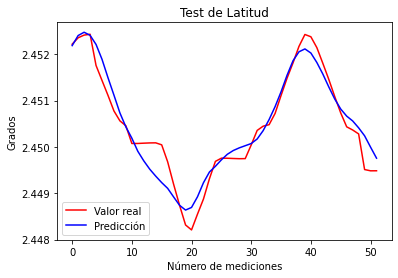

In [87]:
# Graficar resultados
graficar_predicciones(array_latitud,array_latitud_p,'Test de Latitud')

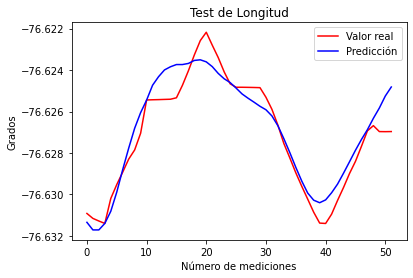

In [88]:
graficar_predicciones(array_longitud,array_longitud_p, 'Test de Longitud')

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
mse_lat = mean_squared_error(array_latitud[time_step:],array_latitud_p, squared=False)

In [91]:
mse_lat

0.00031331284472704206

In [92]:
mse_lon = mean_squared_error(array_longitud[time_step:],array_longitud_p, squared=False)

In [93]:
mse_lon

0.0008227503381276345

In [94]:
haversine(0.00000,0.00000,mse_lat,mse_lon)

0.09792226949989737

In [95]:
#Prediccion con los primeros datos del set de validacion
# Using predicted values to predict next step
X_pred = x_test_n.copy()
for i in range(time_step,len(X_pred)):
    xin = X_pred[i-time_step:i].reshape(1, time_step, 4)
    X_pred[i] = modelo.predict(xin)

1/1 [==============================] - 0s 24ms/step


In [96]:
len(X_pred)

82

In [97]:
X_pred

array([[ 8.77050134e-01,  1.09233809e-01,  1.70567924e-01,
         6.16441232e-01],
       [ 9.67639874e-01,  3.69546676e-02,  3.60706064e-01,
         5.04226525e-01],
       [ 9.66592998e-01,  1.03317607e-02,  3.80660022e-01,
         5.93195245e-01],
       [ 8.85122717e-01,  8.51803470e-02,  5.83269393e-01,
         6.03338947e-01],
       [ 8.28940328e-01,  1.35327712e-01,  4.36684581e-01,
         5.81994908e-01],
       [ 7.40839828e-01,  2.14192406e-01,  6.05142001e-01,
         5.30431089e-01],
       [ 6.60672328e-01,  2.82261112e-01,  3.41135849e-01,
         5.30431089e-01],
       [ 5.68081889e-01,  3.68758569e-01,  9.68150425e-01,
         5.98689752e-01],
       [ 5.27439805e-01,  4.54532696e-01,  6.51381440e-01,
         4.91335569e-01],
       [ 5.25159940e-01,  5.37910113e-01,  5.82118205e-01,
         5.40152137e-01],
       [ 4.80051181e-01,  6.25390005e-01,  1.00000000e+00,
         6.17497868e-01],
       [ 4.20658369e-01,  6.73486133e-01,  2.22563321e-01,
      

In [98]:
xin.shape

(1, 30, 4)

In [99]:
prediccion2 = sc1.inverse_transform(X_pred)

In [100]:
# Funciones auxiliares
def graficar_predicciones2(real, prediccion,campo,title):
    plt.plot(real[0:len(real)], color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
    #plt.ylim(-44,-43)
    plt.title(title)
    plt.xlabel('Numero de mediciones')
    plt.ylabel(campo)
    plt.legend()
    plt.show()

In [101]:
prediccion2

array([[ 2.45190910e+00, -7.66304280e+01, -6.00064010e+00,
         4.50961870e+00],
       [ 2.45229850e+00, -7.66310975e+01, -3.62717580e+00,
        -3.59725140e+00],
       [ 2.45229400e+00, -7.66313441e+01, -3.37809370e+00,
         2.83022920e+00],
       [ 2.45194380e+00, -7.66306508e+01, -8.48953000e-01,
         3.56305360e+00],
       [ 2.45170230e+00, -7.66301863e+01, -2.67874800e+00,
         2.02106900e+00],
       [ 2.45132360e+00, -7.66294558e+01, -5.75920700e-01,
        -1.70412170e+00],
       [ 2.45097900e+00, -7.66288253e+01, -3.87146770e+00,
        -1.70412170e+00],
       [ 2.45058100e+00, -7.66280241e+01,  3.95545600e+00,
         3.22717590e+00],
       [ 2.45040630e+00, -7.66272296e+01,  1.27890000e-03,
        -4.52854910e+00],
       [ 2.45039650e+00, -7.66264573e+01, -8.63323100e-01,
        -1.00183160e+00],
       [ 2.45020260e+00, -7.66256470e+01,  4.35302920e+00,
         4.58595460e+00],
       [ 2.44994730e+00, -7.66252015e+01, -5.35158980e+00,
      

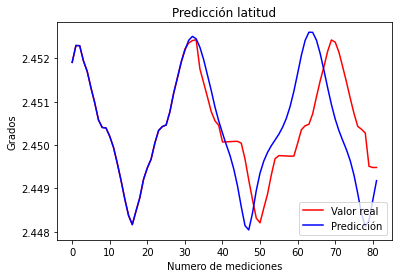

In [102]:
# Graficar resultados de prediccion de valores futuros
graficar_predicciones2(array_latitud,prediccion2[:,0:1],'Grados','Predicción latitud')

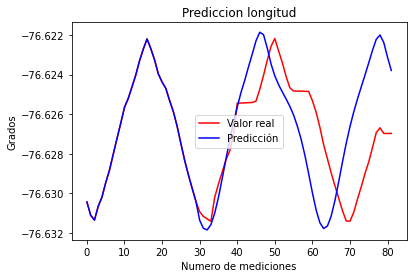

In [103]:
graficar_predicciones2(array_longitud,prediccion2[:,1:2],'Grados','Prediccion longitud')

In [104]:
mse_lat_p = mean_squared_error(array_latitud[time_step:],prediccion2[time_step:,0:1], squared=False)

In [105]:
mse_lat_p

0.0011570831751583112

In [106]:
mse_lon_p = mean_squared_error(array_longitud[time_step:],prediccion2[time_step:,1:2], squared=False)

In [107]:
mse_lon_p

0.0030211458591109324

In [108]:
haversine(0.00000,0.00000,mse_lat_p,mse_lon_p)

0.3598331010673677

In [109]:
calle_5_p = pd.DataFrame(prediccion2[:,0:2])

In [110]:
calle_5_p.to_csv('calle_5_p.csv')

In [111]:
fin = time.time()

AttributeError: 'Series' object has no attribute 'time'

In [ ]:
print(fin-inicio)

In [ ]:
distancia_entrenamiento = []
distancia_entrenamiento.append(0)
for i in range(0, len(set_entrenamiento)-1):
    distancia_entrenamiento.append(haversine(set_entrenamiento.iat[i,4],set_entrenamiento.iat[i,5],set_entrenamiento.iat[i+1,4],set_entrenamiento.iat[i+1,5]))

In [ ]:
d_d_e = pd.DataFrame(distancia_entrenamiento, columns=['distancia'])
d_d_e

In [ ]:
len(distancia_entrenamiento)

In [ ]:
distancia_validacion = []
distancia_validacion.append(0)
for i in range(0, len(set_validacion)-1):
    distancia_validacion.append(haversine(set_validacion.iat[i,4],set_validacion.iat[i,5],set_validacion.iat[i+1,4],set_validacion.iat[i+1,5]))

In [ ]:
d_d_v = pd.DataFrame(distancia_validacion, columns=['distancia'])
d_d_v

In [ ]:
time_entrenamiento = set_entrenamiento['hour']
time_entrenamiento.head(10)

In [ ]:
time_validacion = set_validacion['hour']
time_validacion

In [ ]:
data = pd.read_csv('LoRaWAN_messages_calle_5.csv')

In [ ]:
data

In [ ]:
#data.drop(['hour'], axis=1, inplace=True)

In [ ]:
import random
xi=[random.randint(9,14) for p in range (0,309)]
len(xi)

In [ ]:
xi[0]

In [ ]:
hora = time_validacion[9:10,]
hora

In [ ]:
hora = time_validacion[9:10,]
hora2 = []*400
for i in range(0,len(xi)):
    h = (hora + timedelta(seconds=xi[i]))
    hora2.append(h)
    hora = hora2[i]

In [ ]:
hora2

In [ ]:
hora3 = pd.DataFrame(hora2)

In [ ]:
hora3

In [ ]:
data['hour'] = hora2

In [ ]:
data.to_csv('dcalle5.csv')

In [ ]:
#Calcula la diferencia de tiempo entre puntos de ubicacion
medida_de_tiempo_entrenamiento = []
for i in range(0,len(time_entrenamiento)-1):
    medida_de_tiempo_entrenamiento.append(time_entrenamiento[i+1]-time_entrenamiento[i])
medida_de_tiempo_entrenamiento

In [ ]:
min(medida_de_tiempo_entrenamiento)

In [ ]:
h = datetime.now()
h.hour

In [ ]:
h

In [ ]:
h.minute

In [ ]:

t = timedelta(
    days=0,
    seconds=h.second,
    microseconds=0,
    milliseconds=0,
    minutes=h.minute,
    hours=h.hour,
    weeks=0 )

In [ ]:
t

In [ ]:
#Calcula la diferencia de tiempo entre puntos de ubicacion
medida_de_tiempo_validacion = []
for i in range(0,len(time_validacion)-1):
    medida_de_tiempo_validacion.append(time_validacion[i+1]-time_validacion[i])
medida_de_tiempo_validacion

In [ ]:
len(medida_de_tiempo_validacion)

In [ ]:
#Creamos un objeto deltatime de valor 1 segundo
#Al dividir deltatime / deltatime se obtiene un valor de tipo float
#Al dividir sobre un segundo se obtiene un valor de tiempo en segundos
delta = timedelta(
    days=0,
    seconds=1,
    microseconds=0,
    milliseconds=0,
    minutes=0,
    hours=0,
    weeks=0 )

In [ ]:
duracion_entrenamiento = []
duracion_entrenamiento.append(10)
for i in range(0,len(medida_de_tiempo_entrenamiento)):
    duracion_entrenamiento.append(medida_de_tiempo_entrenamiento[i]/delta)
duracion_entrenamiento

In [ ]:
#index = duracion_entrenamiento.index(1)
#index

In [ ]:
len(duracion_entrenamiento)

In [ ]:
n_e= np.column_stack((duracion_entrenamiento,distancia_entrenamiento))

In [ ]:
n_e

In [ ]:
duracion_validacion = []
duracion_validacion.append(10)
for i in range(0,len(medida_de_tiempo_validacion)):
    duracion_validacion.append(medida_de_tiempo_validacion[i]/delta)
duracion_validacion

In [ ]:
#index = duracion_validacion.index(20)
#len(duracion_validacion)-index-309+5

In [ ]:
n_v= np.column_stack((duracion_validacion,distancia_validacion))

In [ ]:
n_v

In [ ]:
duracion_data_entrenamiento = pd.DataFrame(duracion_entrenamiento, columns=['duracion'])
duracion_data_entrenamiento

In [ ]:
duracion_data_validacion = pd.DataFrame(duracion_validacion, columns=['duracion'])
duracion_data_validacion

In [ ]:
#normalizamos
sc = MinMaxScaler(feature_range=(0,1))
time_entrenamiento_escalado = sc.fit_transform(n_e)

In [ ]:
#normalizamos
#sc2 = MinMaxScaler(feature_range=(0,1))
#time_validacion_escalado = sc2.transform(duracion_data_validacion)

In [ ]:
# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
time_step_t = 30
X_train_duracion = []
Y_train_duracion = []
n = len(n_e)

In [ ]:
for i in range(time_step,n):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train_duracion.append(time_entrenamiento_escalado[i-time_step:i,0:2])
    # Y: el siguiente dato
    Y_train_duracion.append(time_entrenamiento_escalado[i,0:2])

In [ ]:
X_train_duracion, Y_train_duracion = np.array(X_train_duracion), np.array(Y_train_duracion)

In [ ]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train_duracion = np.reshape(X_train_duracion, (X_train_duracion.shape[0], X_train_duracion.shape[1], 2))

In [ ]:
# Red LSTM
#Para crear la red debemos primero definir el tamaño de los datos de entrada y del dato de salida,
#así como el número total de neuronas (50):
dim_entrada_duracion = (X_train_duracion.shape[1],2)
dim_salida_duracion = 2
na_duracion = 100

In [ ]:
#Cear un contenedor usando el módulo Sequential:
modelo_duracion = Sequential()
#añadimos el modelo
modelo_duracion.add(LSTM(units=na_duracion, return_sequences=True, input_shape=dim_entrada_duracion))
#agregamos una capa lSTM
modelo_duracion.add(LSTM(units=na_duracion))
#evitamos el sobreentrtenamiento con dropout
modelo_duracion.add(Dropout(0.2))
#Dense para la capa de salida
modelo_duracion.add(Dense(units=dim_salida_duracion))

In [ ]:
#definimos funcion de error y el método para minimizar
modelo_duracion.compile(optimizer='rmsprop', loss='mse')

In [ ]:
#implementamos el modelo con 20 iteraciones, epochs
#Presentando a la res lstm lotess de 32 datos
modelo_duracion.fit(X_train_duracion,Y_train_duracion,epochs=100,batch_size=32)

In [ ]:
x_test = duracion_data_validacion.values
x_test

In [ ]:
x_test = sc.transform(n_v)
x_test

In [ ]:
#Obtenemos bloques de 60 datos
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0:2])

In [ ]:
X_test = np.array(X_test)
X_test.shape

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],2))

In [ ]:
#Predecimos y normalizamos
prediccion_tiempo = modelo_duracion.predict(X_test)
prediccion_tiempo = sc.inverse_transform(prediccion_tiempo)
prediccion_tiempo.shape

In [ ]:
prediccion_tiempo

In [ ]:
# Funciones auxiliares
def graficar_predicciones3(real, prediccion,campo):
    plt.plot(real[0:len(prediccion)], 'o',   color='red', label='Valor real')
    plt.plot(prediccion,'o', color='blue', label='Predicción')
    #plt.ylim(9,15)
    #plt.xlim(40,50)
    plt.xlabel('Número de mediciones')
    plt.ylabel(campo)
    plt.title('Predicción de tiempo entre mediciones')
    plt.legend()
    plt.show()

In [ ]:
# Graficar resultados
graficar_predicciones3(n_v[:,0:1],prediccion_tiempo[:,0:1],'segundos')

In [ ]:
n_v_t = sc.transform(n_v)

In [ ]:
#Prediccion con los primeros datos del set de validacion
# Using predicted values to predict next step
X_pred_t = n_v_t.copy()
for i in range(time_step_t,len(X_pred_t)):
    xin_t = X_pred_t[i-time_step_t:i].reshape(1, time_step_t, 2)
    X_pred_t[i] = modelo_duracion.predict(xin_t)

In [ ]:
X_pred_t

In [ ]:
prediccion2 = sc.inverse_transform(X_pred_t)

In [ ]:
# Graficar resultados de prediccion de valores futuros
graficar_predicciones3(n_v[:,0:1],prediccion2[:,0:1],'segundos')

In [ ]:
mse_t = mean_squared_error(n_v[time_step_t:,0:1] ,prediccion2[time_step_t:,0:1], squared=False)

In [ ]:
mse_t

In [ ]:
n_v[time_step_t:,0:1]

In [ ]:
prediccion2[time_step_t:,0:1]